In [65]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

In [66]:
%run src/ssy_fp_discretized.py

In [76]:
ssy = SSY()

In [82]:
G = 3
D = 3

In [89]:

def wealth_plot(R, 
                 x, y, 
                 xlb, ylb, 
                 txt_flag="by", 
                 dot_loc=None,
                 coords=(-225, 30)):

    if txt_flag == "by":
        text = "Bansal and Yaron"
    else:
        text = "Schorfheide, Song and Yaron"

    param1_value, param2_value = dot_loc

    fig, ax = plt.subplots(figsize=(10, 5.7))

    #cs1 = ax.contourf(x, y, R.T, alpha=0.5)

    #ctr1 = ax.contour(x, y, R.T, levels=[1.0])

    plt.clabel(ctr1, inline=1, fontsize=13)
    plt.colorbar(cs1, ax=ax)

    ax.annotate(text, 
                xy=(param1_value, param2_value),  
                xycoords="data",
                xytext=coords,
                textcoords="offset points",
                fontsize=12,
                arrowprops={"arrowstyle" : "->"})

    ax.plot([param1_value], [param2_value],  "ko", alpha=0.6)

    ax.set_xlabel(xlb, fontsize=16)
    ax.set_ylabel(ylb, fontsize=16)

    plt.show()



In [90]:
psi_vec = np.linspace(1.1, 4.0, G)
mu_vec = np.linspace(0.0005, 0.003, G)

R = np.empty((G, G))

In [91]:
dot_loc = ssy.ψ, ssy.μ_c

In [92]:
for i, ψ in enumerate(psi_vec):
    for j, μ_c in enumerate(mu_vec):
        ssy.ψ = ψ
        ssy.μ_c = μ_c
        R[i, j] = average_wealth_cons(ssy, K=D, I=D, J=D, verbose=False)


NameError: name 'ctr1' is not defined

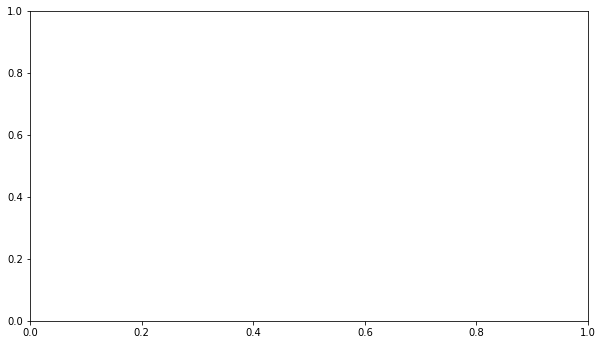

In [93]:
wealth_plot(R, 
               psi_vec, mu_vec, 
                "$\psi$", "$\mu_c$", 
                txt_flag='ssy',
                dot_loc=dot_loc,
                coords=(25, 25))